***
## Ames housing prices



### *Import libs*

In [3]:
# Basic libs for working with data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
import scipy as sci
import plotly.express as px

import warnings 

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', 
              palette='coolwarm', 
              rc={'figure.figsize' :(15,10)})


***

## Dataset Loading

### *Load data from local*

- *Using these script to load data from your local*

- *File downloaded requires (if not)*

In [4]:
local_train_set_path = 'home-data-for-ml-course/train.csv'
local_test_set_path = 'home-data-for-ml-course/test.csv'

train_df = pd.read_csv(local_train_set_path, index_col='Id')
test_df = pd.read_csv(local_test_set_path, index_col='Id')



### *Fetch data from Github*



In [5]:
# url_train_path = 'https://raw.githubusercontent.com/lovecrushfamily/Alzheimer_Disease/refs/heads/main/alzheimers_disease_data.csv'
# url_test_path = 'https://raw.githubusercontent.com/lovecrushfamily/Alzheimer_Disease/refs/heads/main/alzheimers_disease_data.csv'

# train_df = pd.read_csv(url_train_path)
# test_df = pd.read_csv(url_test_path)

# train_df

***

## Dataset Overview

### *No. Features, Samples*

**Train set:**

- *1460 rows × 80 columns*

**Test set:**

- *1459 rows × 79 columns*

In [6]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

***

## Feature filtering

### *Categorical and Numerical variables*

In [9]:
def filter_cat_cols(df:pd.DataFrame, drop_cols:str=None):
    """"""
    if drop_cols==None:
        return df.select_dtypes(include=['object']).columns
    
    else:
        return df.select_dtypes(include=['object']).drop(columns={drop_cols}).columns

def filter_num_cols(df:pd.DataFrame, drop_cols:str=None):
    """"""
    if drop_cols==None:
        return df.select_dtypes(exclude=['object']).columns
    
    else:
        return df.select_dtypes(exclude=['object']).drop(columns={drop_cols}).columns



In [10]:
cat_cols = filter_cat_cols(train_df)
num_cols = filter_num_cols(train_df,drop_cols='SalePrice')
tar_col = ["SalePrice"]

***

## Exploratory Data Analysis

### *Missing values*

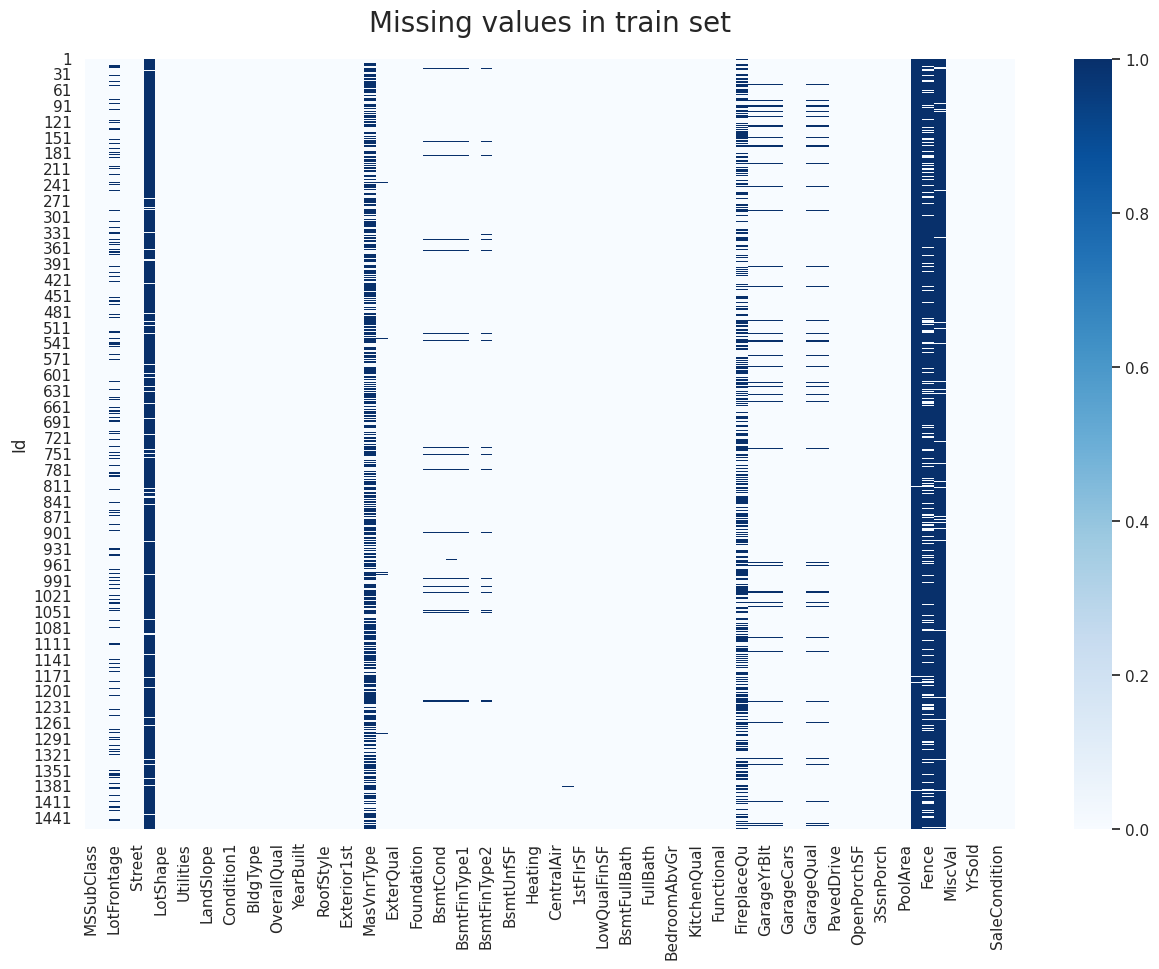

In [11]:
plt.subplots(figsize=(15, 10))
sns.heatmap(train_df.isnull(), cmap='Blues')

plt.title("Missing values in train set", fontsize=20, pad=20)
plt.show()

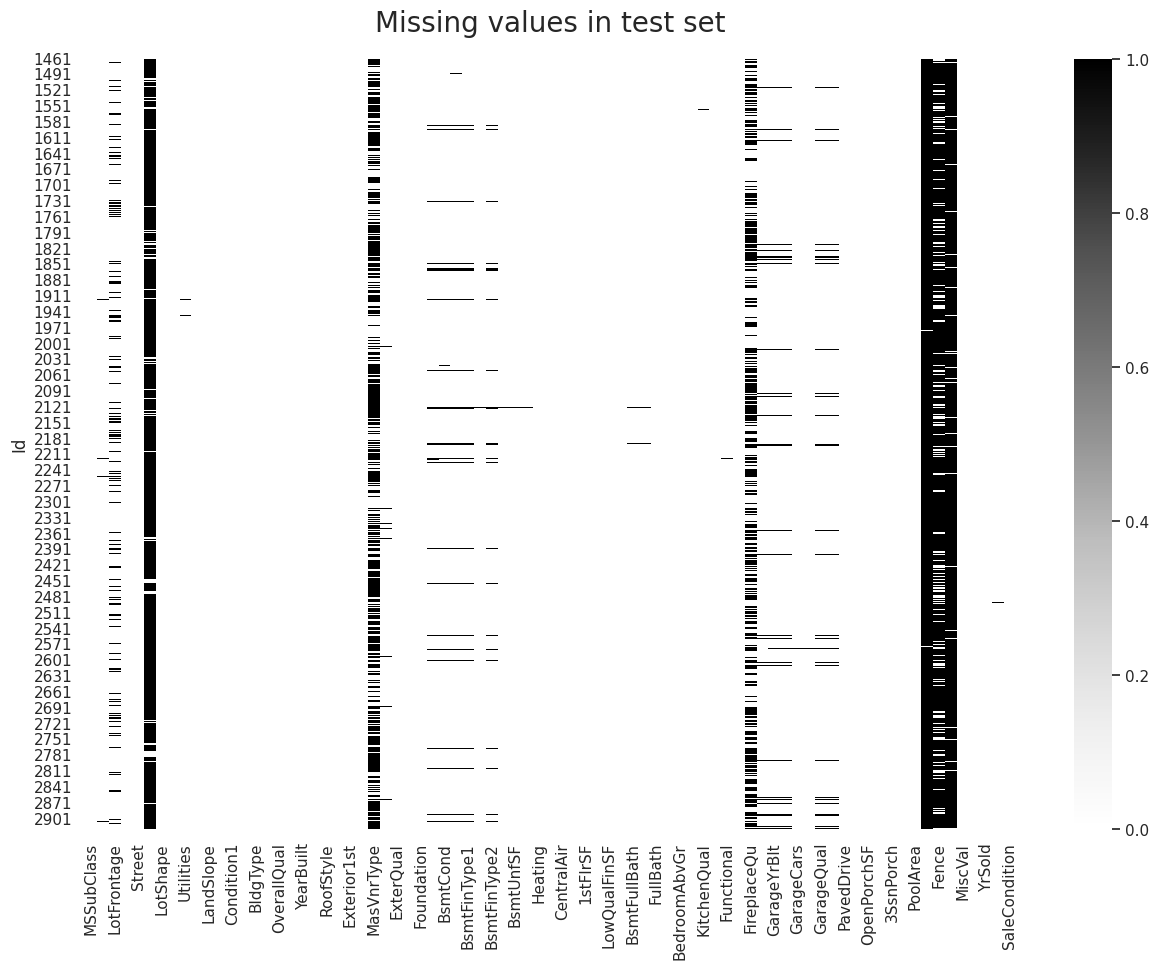

In [12]:
plt.subplots(figsize=(15, 10))
sns.heatmap(test_df.isnull(), cmap='Greys')

plt.title("Missing values in test set", fontsize=20, pad=20)
plt.show()

In [13]:
def report_missing_values(train_set:pd.DataFrame, test_set:pd.DataFrame=None):
    """"""
    miss_train_count = train_set.isnull().sum()
    miss_train_ratio = train_set.isnull().sum() / len(train_set) * 100

    cols_name = ['No. train set', "Ratio"]

    missing_report = pd.DataFrame([miss_train_count,miss_train_ratio.round(3),]).T
    missing_report.columns = cols_name

    
    if test_set is not None:
        missing_report["<> No. test set"] = test_set.isnull().sum()
        missing_report["test_ratio"] = round(test_df.isnull().sum()/len(test_df) * 100, 2)

    missing_report.sort_values("No. train set", inplace=True, ascending=False)

    return missing_report


In [14]:
report_missing_values(train_set=train_df, test_set=test_df)


,No. train set,Ratio,<> No. test set,test_ratio
PoolQC,1453.0,99.521,1456.0,99.79
MiscFeature,1406.0,96.301,1408.0,96.50
Alley,1369.0,93.767,1352.0,92.67
Fence,1179.0,80.753,1169.0,80.12
MasVnrType,872.0,59.726,894.0,61.27
FireplaceQu,690.0,47.260,730.0,50.03
LotFrontage,259.0,17.740,227.0,15.56
GarageYrBlt,81.0,5.548,78.0,5.35
GarageCond,81.0,5.548,78.0,5.35
GarageType,81.0,5.548,76.0,5.21


### *Duplicated records*


In [15]:
def filter_duplicated_records(train_set:pd.DataFrame):

    dup_ratio = train_set.duplicated().value_counts(normalize=True).to_frame()
    dup_count = train_set.duplicated().value_counts().to_frame()

    return pd.concat([dup_ratio, dup_count], axis=1)


filter_duplicated_records(train_df)


,proportion,count
False,1.0,1460


**False:** *indicate the number of unique records in dataset*

**True** *indicate the number of duplicated records in dataset*

### *Numerical Data*

In [16]:
def numerical_vars(df:pd.DataFrame, discrete_limit:int=5):
    vars_type = []

    for col in num_cols:
        if len(df[col].value_counts().values) <= discrete_limit:
            vars_type.append("Discrete ")

        else:
            vars_type.append("Continuos")

    return vars_type
    

def mcv_freq(df:pd.DataFrame, mcv:pd.DataFrame) -> float:
    """The function take the dataframe `df` and the dataframe `mcv`
    Args:
        df : the original data
        mcv : the most common value in each columns"""
    mcv_freq_= []
    for idx, col in enumerate(df.columns):
        mcv_freq_.append((df[df[col]==mcv[idx]].shape[0] / df.shape[0]) )

    return mcv_freq_

                
def outlier_prop(df:pd.DataFrame, lower_f:pd.DataFrame, upper_f:pd.DataFrame):
    """The function take lower_fence and upper fence as the two indicator of outlier
    Outliers are values that fall outside of these fence, 
    smaller than lower_f and higher than upper_f"""
    outliers_prop_ = []

    for idx, col in enumerate(df.columns):
        no_outliers = df[(df[col] > upper_f[idx]) | (df[col] < lower_f[idx])].shape[0]
        outliers_prop_.append(no_outliers / df.shape[0] * 100)
        
    return outliers_prop_
 
 

In [17]:
numerical_stats = train_df[num_cols].describe().transpose()
numerical_stats['IQR'] = numerical_stats["75%"] -  numerical_stats["25%"]
numerical_stats['lower fence'] = numerical_stats["25%"] - (numerical_stats['IQR']  * 1.5)
numerical_stats['upper fence'] = numerical_stats["75%"] + (numerical_stats['IQR']  * 1.5)
numerical_stats['skewness'] = train_df[num_cols].skew()
numerical_stats['kurtosis'] = train_df[num_cols].kurtosis()
numerical_stats['mcv'] = train_df[num_cols].mode().T
numerical_stats['mcv freq'] = mcv_freq(train_df[num_cols], numerical_stats['mcv'])
numerical_stats['outliers prop'] = outlier_prop(train_df[num_cols], numerical_stats['lower fence'], numerical_stats['upper fence'])
numerical_stats['vars'] = numerical_vars(train_df[num_cols], discrete_limit=15)

numerical_stats.sort_values('vars').round(3)


,count,mean,std,min,25%,50%,75%,max,IQR,lower fence,upper fence,skewness,kurtosis,mcv,mcv freq,outliers prop,vars
TotalBsmtSF,1460.0,1057.429,438.705,0.0,795.75,991.5,1298.25,6110.0,502.50,42.000,2052.000,1.524,13.250,0.0,0.025,4.178,Continuos
GarageArea,1460.0,472.980,213.805,0.0,334.50,480.0,576.00,1418.0,241.50,-27.750,938.250,0.180,0.917,0.0,0.055,1.438,Continuos
WoodDeckSF,1460.0,94.245,125.339,0.0,0.00,0.0,168.00,857.0,168.00,-252.000,420.000,1.541,2.993,0.0,0.521,2.192,Continuos
OpenPorchSF,1460.0,46.660,66.256,0.0,0.00,25.0,68.00,547.0,68.00,-102.000,170.000,2.364,8.490,0.0,0.449,5.274,Continuos
EnclosedPorch,1460.0,21.954,61.119,0.0,0.00,0.0,0.00,552.0,0.00,0.000,0.000,3.090,10.431,0.0,0.858,14.247,Continuos
3SsnPorch,1460.0,3.410,29.317,0.0,0.00,0.0,0.00,508.0,0.00,0.000,0.000,10.304,123.662,0.0,0.984,1.644,Continuos
ScreenPorch,1460.0,15.061,55.757,0.0,0.00,0.0,0.00,480.0,0.00,0.000,0.000,4.122,18.439,0.0,0.921,7.945,Continuos
GrLivArea,1460.0,1515.464,525.480,334.0,1129.50,1464.0,1776.75,5642.0,647.25,158.625,2747.625,1.367,4.895,864.0,0.015,2.123,Continuos
LowQualFinSF,1460.0,5.845,48.623,0.0,0.00,0.0,0.00,572.0,0.00,0.000,0.000,9.011,83.235,0.0,0.982,1.781,Continuos
2ndFlrSF,1460.0,346.992,436.528,0.0,0.00,0.0,728.00,2065.0,728.00,-1092.000,1820.000,0.813,-0.553,0.0,0.568,0.137,Continuos


### *Categorical data*

In [53]:
# def calculate_hist_bins(data: pd.Series) -> int:
#     """Freedman-Diaconis rule"""
#     interquartle = data.quantile(0.75,interpolation='midpoint') - data.quantile(0.25, interpolation='midpoint')
#     n = len(data)
#     bin_width = 2 * interquartle * (n ** (-1/3))
#     n_bins = (data.max() - data.min()) / bin_width
#     return interquartle

# train_df[cat_cols]


In [51]:
categorical_stats = train_df[cat_cols].describe(include='object').T
categorical_stats['null vals'] = train_df.shape[0] - categorical_stats['count']
categorical_stats['null prop'] = categorical_stats['null vals'] / train_df.shape[0] * 100
categorical_stats['freq prop'] = categorical_stats['freq'] / train_df.shape[0] * 100

categorical_stats



,count,unique,top,freq,null vals,null prop,freq prop
MSZoning,1460,5,RL,1151,0,0.0,78.835616
Street,1460,2,Pave,1454,0,0.0,99.589041
Alley,91,2,Grvl,50,1369,93.767123,3.424658
LotShape,1460,4,Reg,925,0,0.0,63.356164
LandContour,1460,4,Lvl,1311,0,0.0,89.794521
Utilities,1460,2,AllPub,1459,0,0.0,99.931507
LotConfig,1460,5,Inside,1052,0,0.0,72.054795
LandSlope,1460,3,Gtl,1382,0,0.0,94.657534
Neighborhood,1460,25,NAmes,225,0,0.0,15.410959
Condition1,1460,9,Norm,1260,0,0.0,86.30137


### *Target feature*

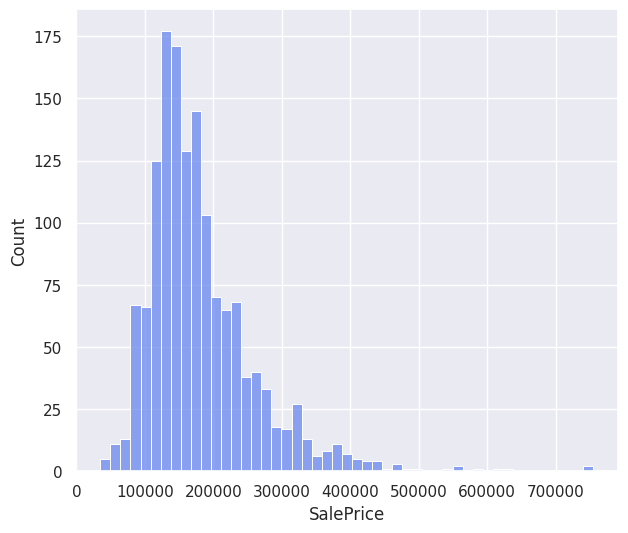

In [66]:
plt.figure(figsize=(7, 6))

sns.histplot(data=train_df,
                  x=tar_col[0], 
                  palette='Blues', 
                  )
plt.show()



### Data leakage handeling

In [ ]:
# Be careful with these feature they not leaked as you think

potential_leak = [
    'Street',   # imbalance distributed, ~ 100% is Pave so not make a lot impact on models => drop
    'Alley',    # high rate missing value ~ 94% nan (no alley access) burdening model => drop
    'Utilities', # skewed distributed ~ 100% is AllPub, just one entries is NoSeWa => drop
    'LandSlope', # imbalance distributed ~ 95% is Gtl still unacceptable => drop
    'Neighborhood', # train_test leakage ~ Not relevant to house price => drop
    'Condition2', # imbalance distributed ~ 99% is Norm, burdening model = drop
    'BldgType', # not relevant to the house price => drop
    'YearRemodAdd', # not have good understand of this field => drop
    'RoofMatl', # imbalance distributed, ~98% is CompShg => drop
    'Exterior2nd', # not necessary, similar to 1nd one, burden for model => drop
    'ExterQual', # not necessary, => drop
    'Heating', # Overwhelm t, ~98% is GasA, => drop
    'LowQualFinSF', # overwhelm, ~98% is 0, => drop
    'BsmtHalfBath', # overwhelm, ~94% is 0, => drop
    'KitchenAbvGr', #overwhelm, ~95% is 1 => drop
    'Functional', #overwhelm, ~93% is Typ => drop
    'GarageYrBlt' , # not relevant to house price, => drop
    'GarageQual', #  overwhelm => ~95% is TA => drop
    'GarageCond', # overwhelm , ~96% is TA => drop
    '3SsnPorch', # overwhelm, ~98% is 0 =< drop
    'ScreenPorch', # overwhelm ~92% is 0, drop
    'PoolArea', # overwhelm, ~99% is 0 => drop
    'PoolQC', # overwhelm, ~100% is na => drop
    'Fence', #  overwhelm, ~98% is na   
    'MiscFeature', #Overwhelm, ~96% is nan => drop
    'MiscVal', # overwhelm, ~ 96% is 0 => drop
    'SaleCondition', # any relevant here, => drop
]                                               

# Exterior2ndExterQual

train_data = train_data.drop(potential_leak, axis=1)
test_data = test_data.drop(potential_leak, axis=1)

In [ ]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Condition1,HouseStyle,OverallQual,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Lvl,Inside,Norm,2Story,7,...,2,548,Y,0,61,0,2,2008,WD,208500
2,20,RL,80.0,9600,Reg,Lvl,FR2,Feedr,1Story,6,...,2,460,Y,298,0,0,5,2007,WD,181500
3,60,RL,68.0,11250,IR1,Lvl,Inside,Norm,2Story,7,...,2,608,Y,0,42,0,9,2008,WD,223500
4,70,RL,60.0,9550,IR1,Lvl,Corner,Norm,2Story,7,...,3,642,Y,0,35,272,2,2006,WD,140000
5,60,RL,84.0,14260,IR1,Lvl,FR2,Norm,2Story,8,...,3,836,Y,192,84,0,12,2008,WD,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Reg,Lvl,Inside,Norm,2Story,6,...,2,460,Y,0,40,0,8,2007,WD,175000
1457,20,RL,85.0,13175,Reg,Lvl,Inside,Norm,1Story,6,...,2,500,Y,349,0,0,2,2010,WD,210000
1458,70,RL,66.0,9042,Reg,Lvl,Inside,Norm,2Story,7,...,1,252,Y,0,60,0,5,2010,WD,266500


### Handle Missing Data

In [ ]:
X = train_data.drop("SalePrice",axis=1)
y = train_data["SalePrice"]
X_test = test_data

In [ ]:
low_cardinality_cat_cols = [col for col in cat_cols(X) if X[col].nunique() < 10]
high_cardinality_cat_cols = [col for col in cat_cols(X) if X[col].nunique() > 10]

In [ ]:
X['HouseStyle']

Id
1       2Story
2       1Story
3       2Story
4       2Story
5       2Story
         ...  
1456    2Story
1457    1Story
1458    2Story
1459    1Story
1460    1Story
Name: HouseStyle, Length: 1460, dtype: object

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
# from sklearn.preprocessing import Sa

# preprocessing pipeline
num_transformer = make_pipeline(
    SimpleImputer(strategy='median'), 
    MinMaxScaler())

cat_OH_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

cat_OR_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols(X, drop_salePrice=True)),
    ('OH_cat', cat_OH_transformer, low_cardinality_cat_cols),
    ('OR_cat', cat_OR_transformer, high_cardinality_cat_cols)
], verbose=True)

In [ ]:
preprocessor.fit(X=X)

[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing OH_cat, total=   0.0s
[ColumnTransformer] ........ (3 of 3) Processing OR_cat, total=   0.0s


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', '...
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'HeatingQC', 'CentralAir',
                                  'Electrical', 'KitchenQual', 'FireplaceQu',
                                  'GarageType', 'GarageFinish', 'PavedDrive',
                                  'SaleType']),
                                ('OR_cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Exterior1st'])],
                  verbose=True)

In [ ]:
X_trans = preprocessor.transform(X)
# X_test = preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_trans)

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.122500,0.125089,0.000000,0.064212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.000000,0.173281,0.000000,0.121575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.101250,0.086109,0.000000,0.185788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.000000,0.038271,0.000000,0.231164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.218750,0.116052,0.000000,0.209760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.000000,0.000000,0.000000,0.407962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.074375,0.139972,0.110583,0.252140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.000000,0.048724,0.000000,0.375428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.000000,0.008682,0.698100,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0


In [ ]:
# X['HouseStyle'].unique()

In [ ]:
# pd.DataFrame(new_X, columns=X[low_cardinality_cat_cols[0]].unique())

### Score Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train , y_valid = train_test_split(X, y, random_state=16)


In [ ]:
X_train.mode().T

,0
MSSubClass,20
MSZoning,RL
LotFrontage,60.0
LotArea,9600
LotShape,Reg
LandContour,Lvl
LotConfig,Inside
Condition1,Norm
HouseStyle,1Story
OverallQual,5


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    model= LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    return mean_absolute_error(y_valid, predictions)


In [ ]:
score_dataset(X_train, X_valid, y_train, y_valid)

ValueError: could not convert string to float: 'RL'

In [ ]:
score_dataset(X_train, X_valid, y_train, y_valid)


12792264088160.652

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=500, random_state=0, verbose=True)

my_pipeline = Pipeline(steps=[
    ('Col_trans', preprocessor),
    ('rf_model', rf_model)
])

scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error', verbose=True)

scores, scores.mean()



ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/utils/_indexing.py", line 338, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/utils/_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/utils/_indexing.py", line 340, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for dataframes.


### XGBoost

In [ ]:
from xgboost import XGBRegressor

# def score_dataset_xgboost(X_train, X_valid, y_train, y_valid):
xg_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
# xg_model.fit(X_train, y_train)
# predictions = xg_model.predict(X_valid)
# mean_absolute_error(y_valid, predictions)

scores_xg = -1 * cross_val_score(xg_model, X, y, cv=5, scoring='neg_mean_absolute_error', verbose=True)

scores_xg, scores_xg.mean()




(array([16463.62241813, 17194.87194991, 17322.32277397, 14906.08653949,
        17969.51337757]),
 16771.28341181507)

In [ ]:
X

array([[ 0.23529412,  0.15068493,  0.0334198 , ...,  0.        ,
         1.        , 12.        ],
       [ 0.        ,  0.20205479,  0.03879502, ...,  0.        ,
         1.        ,  8.        ],
       [ 0.23529412,  0.1609589 ,  0.04650728, ...,  0.        ,
         1.        , 12.        ],
       ...,
       [ 0.29411765,  0.15410959,  0.03618687, ...,  0.        ,
         1.        ,  5.        ],
       [ 0.        ,  0.1609589 ,  0.03934189, ...,  0.        ,
         1.        ,  8.        ],
       [ 0.        ,  0.18493151,  0.04037019, ...,  0.        ,
         1.        ,  6.        ]])

### Learning curve